# **Positive or Negative Movie Review Classification using Neural Networks**

## **Introduction**

This project intends to use the IMDB dataset to solve the baseline model's overfitting problems and build successions of the model. I will be researching different hyperparameters and applying them to the model through trial and error, to see if the validation accuracy can be increased. This research will consist of, identifying the different activation functions (e.g. `relu`, `tanh` and `softmax`), identifying the different loss functions (e.g. `binary_crossentropy`, `mse`, and `mean_absolute_error`), experimenting with different optimizers e.g. `adam`, increasing/decreasing the number of hidden layers, and constantly tuning the learning rate. I will also be looking into preventing the risk of overfitting using L1/L2 regularization and adding dropout layers. Finally, once the hyperparameter modifications have been applied, I will be evaluating the optimal model for its optimal epochs and comparing it against the baseline model.

## **Methodology**

### **4.5.1. Defining the Problem and Assembling a Dataset**

This research is focused specifically on the IMDB (Internet Movie Database) dataset, a binary sentiment analysis dataset comprising of 50,000 movie reviews, which are evenly distributed as both training and testing data. The IMDB dataset is categorised into two different classes, positive and negative reviews. This research aims to investigate whether a deep learning model can be trained on the IMDB dataset and optimised, so it can accurately classify whether a movie review belongs to a positive or negative class.

The input data consists of two variables: a label belonging to either a positive or negative class, and an array of text encoded as numbers. The problem being faced at hand is a binary classification problem, as one of the two classes are being predicted (positive and negative). We can hypothesise that the outputs can be predicted based on the given inputs, and that the availability of data is adequately useful to study the relationship between the inputs and outputs. 

### **4.5.2. Choosing Measure of Success**

The measure of success that will be used for this problem is accuracy, specifically classification accuracy. This type of accuracy involves the model making a prediction for each input in the dataset and comparing them against labels in the dataset i.e. positive or negative. The accuracy is then measured by the number of correct predictions divided by the number of overall predictions:

***Accuracy = Correct Predictions ÷ Overall Predictions***

Therefore, the choice of the loss function to be used for this problem is "binary_crossentropy" along with the "accuracy" metric since we are measuring accuracy. This loss function is ideal for this classification problem since we are only working with two classes, providing a high chance of achieving a low loss and high accuracy depending on how the model's hyperparameters have been tuned.

### **4.5.3. Deciding on an Evaluation Protocol**

Since the IMDB dataset has a large availability of data, it makes sense to use hold-out validation. To have a good deep learning workflow, it is ideal, to begin with, a small model and then develop it until the data overfits. This will then put in place other systems of measure such as L1/L2 regularisation and dropout layers until the overfitting is reduced and an optimal model is achieved. Therefore, the IMDB dataset has been split into three sub-datasets: training, validation, and testing.

The IMDB dataset has a total of 50,000 samples for both training and testing. Out of the 25,000 training samples, 10,000 review samples were extracted to construct the validation set. The other 15,000 review samples were used to construct the training set itself, whilst the 25,000 testing samples remained for testing and evaluating the final model.  The use of a validation set has been very beneficial during each iteration of developing and training the model, as it allowed metrics such as loss and accuracy to be displayed for both the training and validation dataset. These benchmark data were helpful in the decision-making process of how the model needed to be tuned, eventually leading to an optimal model.

### **4.5.4. Preparing the IMDB Dataset**

Now that the dataset has been recognised along with the problem at hand, the aim for optimisation and the evaluation approach, we are one step closer to training the model. The last step is to prepare the IMDB dataset for training. As we can see from the cell below, the imdb is being imported directly from the tensorflow.keras.datasets library which means that the dataset has already been pre-processed. Each review has been represented as a sequence of words, and they have been encoded into a list of sequential integers where each index in the list represents a word.

In the cell below, we can see that the imdb dataset is loaded with 10,000 samples of the most common reviews via list unpacking. Each of the four lists are represented as subsets within the imdb dataset. `train_data` represents a list of the 25,000 training samples in the form of integers, `train_labels` represents the 0 and 1 labels for the training data. These 0s and 1s belong to their respective class of a positive or negative review. `test_data` represents a list of the 25,000 test samples in the form of integers. Finally, `test_labels` represents the 0 and 1 labels for the test data. Formatting the data using this method enables it to be directly put into the deep learning model in a way that it is able to understand the data.

Since a deep learning model is unable to recognise integers, the lists have been transformed through a process known as **vectorisation**. We are easily able to do this using the `vectorize_sequences` function. This helper function converts every review into a vector comprising of 10,000 zeros and then iterates through the vector to set their respective indices as 1. Once the training and testing data have been vectorised, they are then assigned onto variables known as `x_train` and `x_test`. Finally, the training and testing labels are assigned onto variables known as `y_train` and `y_test`, and then converted into a 32-bit floating point data type making it easier to feed the data into the deep learning model.


In [ ]:
# IMDB
from tensorflow.keras.datasets import imdb # importing imdb dataset
import matplotlib.pyplot as plt # matlplotlib library allows visual representation of data
import numpy as np # numpy library allows manipulation and computation of data e.g. resizing an array

# these tensorflow libraries are essential for creating the model itself and adding weight regularization
from tensorflow.keras import models, layers, optimizers, regularizers

# load
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

# helper function that decodes a review
def review_decoder(training_data):
  word_index = imdb.get_word_index() # retrieves the word to integer index mappings
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # mapping integer indexes to their specific words
  decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in training_data])
  return decoded_review

# # example of decoding a review and its respective label (positive=1, negative=0)
print("Review: " + str(review_decoder(train_data[15])))
print("Label: " + str(train_labels[15]))

Review: ? a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh ? like character with wall to wall hot babes and mix in a ? and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily ? compound the plot was somewhere between preposterous and non existent how many ? are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become ? through ? responsibility this was written for ? males it plays like a video game i did enjoy the ? ii landing in the desert though
Label: 0


In [ ]:
# vectorisation function
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# helper function for training the dataset
def train_data(model, train_x, train_y, epoch, batches, val_x, val_y):
  return model.fit(train_x, train_y, epochs=epoch, batch_size=batches, validation_data = (val_x, val_y))

# helper function for plotting training/validation loss
def plot_loss(history):
  history_dict = history.history
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  epochs = range(1, len(loss) + 1)
  blue_dots = 'bo'
  solid_blue_line = 'b'

  plt.plot(epochs, loss, blue_dots, label = 'Training loss')
  plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# helper function for plotting training/validation accuracy
def plot_accuracy(history, acc, val_acc, epochs):
  print('\n') # creates a space between the training/validation loss graph and the training/validation accuracy graph
  history_dict = history.history
  history_dict['accuracy']
  plt.clf()
  blue_dots = 'bo'
  solid_blue_line = 'b'
      
  plt.plot(epochs, acc, blue_dots, label = 'Training acc')
  plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
  plt.title('Training and validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

### **4.5.5. Developing a model that does better than the baseline**

The purpose of the baseline model was to prove our hypotheses of predicting outputs based on the given inputs and having adequate data to learn the relationship between the inputs and the outputs. The baseline model was said to achieve an accuracy of 50%. The goal at this point is to achieve statistical power, in this case with the IMDB dataset, anything with an accuracy above 50% to be able to able to surpass common sense. If the developed model is unable to beat the baseline, it could be that the hypotheses were proven to be false.

The baseline model was built upon the sequential architecture, which is a popular architecture for classification problems. The model consists of a total of three layers, two of which contain 16 units along with a `relu` activation function. The last layer contains 1 unit with a `sigmoid` activation function. This is very useful as it establishes useful constraints on the output of the model. In the case of this model, it is used to output a single possible value e.g. 0 or 1, which is needed since this is a binary classification problem.

The optimiser function that was used in the baseline model, was `rmsprop` using a default learning rate. Optimiser functions are capable of having adjustable learning rates to reduce the risk of having a high loss. The loss function used was `binary_crossentropy`, which as previously mentioned, is ideal for this binary classification problem as the baseline is only working with two classes providing a greater chance of achieving low loss and high accuracy. Finally, the metric used was `accuracy`, since the baseline model was trying to measure accuracy.

After the model had been built and compiled, it was then trained on the training set containing 10,000 samples, for 20 epochs and a batch size of 512. The `validation_data` parameter represented the validation dataset containing the metrics for both loss and accuracy.

### **Model 1: Replace the `binary_crossentropy` loss function with `mean_absolute_error`**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['accuracy'])

# train
history_model_1 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.3434 - accuracy: 0.7588 - val_loss: 0.2334 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1754 - accuracy: 0.8995 - val_loss: 0.1688 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1207 - accuracy: 0.9238 - val_loss: 0.1514 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0917 - accuracy: 0.9395 - val_loss: 0.1343 - val_accuracy: 0.8924
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0724 - accuracy: 0.9505 - val_loss: 0.1399 - val_accuracy: 0.8788
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0604 - accuracy: 0.9592 - val_loss: 0.1356 - val_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0505 - accuracy: 0.9649 - val_loss: 0.1271 - val_accuracy: 0.8831
Epoch 8/20
30

### **Summary of Model 1**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Val: | L2 Val: |Dropout Val:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924

The outputs from the model 1 training data shows that the model was able to achieve a maximum accuracy of 0.8924 after 4 epochs as well as a minimum loss of 0.1252 after 8 epochs. This proves that the model has achieved statistical power, since it was greater than the basline accuracy of 0.5. However, the performance wasn't great as there were clear signs of overfitting.

### **4.5.6. Scaling up: Developing a model that overfits**

The baseline model achieved an accuracy of over 50%. However, it wasn’t sufficiently powerful enough. Although the baseline model had enough layers and parameters, it was clear that the model was overfitting, which means the model was not performing well. Therefore, in order to create a succession of the baseline, the loss function was replaced as an experiment to see if the performance could be improved. The aim of the next iteration was to  keep the loss to a minimum whilst maintaining high accuracy without overfitting. All the parameters from the baseline model were kept the same including the optimiser function. The loss function was replaced from `binary_crossentropy` to `mean_absolute_error`. After compiling the data again, the model was trained on the partial training set for the same number of epochs and the same batch size – ***Refer to Summary of Model 1 and Results***.

### **Model 2: Replace the `mean_absolute_error` loss function with `mse`**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

# train
history_model_2 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 3s 91ms/step - loss: 0.1836 - accuracy: 0.7763 - val_loss: 0.1312 - val_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1018 - accuracy: 0.9008 - val_loss: 0.0989 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0709 - accuracy: 0.9261 - val_loss: 0.0890 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0535 - accuracy: 0.9437 - val_loss: 0.0893 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0426 - accuracy: 0.9553 - val_loss: 0.0823 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0343 - accuracy: 0.9664 - val_loss: 0.0834 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0275 - accuracy: 0.9735 - val_loss: 0.0849 - val_accuracy: 0.8839
Epoch 8/20
30

### **Summary of Model 2**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Val: | L2 Val: |Dropout Val:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899

The outputs from the model 2 training data shows that the model was able to achieve a maximum accuracy of 0.8899 after 5 epochs as well as a minimum loss of 0.0823 after 5 epochs. This shows that the loss for model 2 was better optimised than model 1. Therefore, the `mse` loss function will be used throughout all the other iterations.

### **Model 3: Replace the `rmsprop` optimizer function with `adam`**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# train
history_model_3 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1950 - accuracy: 0.7434 - val_loss: 0.1370 - val_accuracy: 0.8555
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0974 - accuracy: 0.9023 - val_loss: 0.0950 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0627 - accuracy: 0.9346 - val_loss: 0.0854 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0458 - accuracy: 0.9537 - val_loss: 0.0843 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0348 - accuracy: 0.9671 - val_loss: 0.0852 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0263 - accuracy: 0.9786 - val_loss: 0.0872 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0201 - accuracy: 0.9849 - val_loss: 0.0892 - val_accuracy: 0.8789
Epoch 8/20
30

### **Summary of Model 3**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Val: | L2 Val: |Dropout Val:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899
|3  |16, 16, 1  |3  |adam  |N/A  |N/A  |N/A  |N/A  |0.0843  |0.8904

The outputs from the model 3 training data shows that the model was able to achieve a maximum accuracy of 0.8904 after 3 epochs as well as a minimum loss of 0.0843 after 4 epochs. Although, the loss is slightly greater than the previous iteration, the accuracy is greater. Therefore, the `adam` optimiser function will be retained throughout all the other iterations.

### **4.5.7. Regularizing the model and tuning the hyperparameters**

After repeatedly modifying and training the model, it was evident that the model was still overfitting. This meant that the model had to be regularised and the parameters had to be tuned, so the model would neither overfit nor underfit, achieving an optimal model. There are several ways to regularise the model and tune the hyperparameters, these include:
 -	Adding/Removing Layers
 -	Adding L1/L2 Regularisation
 -	Adding Dropout Layers
 -	Trying out different number of units per layer
 -	Trying out different learning rates of the optimiser (ideally somewhere between 0.1 and 0.01)

The next iteration of the model tunes the hyperparameter by changing the learning rate of the optimiser function. By adjusting the learning rate, not only does it reduce the chances of the model overfitting, but it also has an effect on how quickly the model can arrive at its best accuracy – ***Refer to Summary of Model 4 and Results***.

### **Model 4: Tune the learning rate to 0.001**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# train
history_model_4 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2032 - accuracy: 0.7460 - val_loss: 0.1453 - val_accuracy: 0.8443
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1050 - accuracy: 0.8884 - val_loss: 0.0963 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0653 - accuracy: 0.9273 - val_loss: 0.0845 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0467 - accuracy: 0.9513 - val_loss: 0.0834 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0349 - accuracy: 0.9674 - val_loss: 0.0840 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0271 - accuracy: 0.9773 - val_loss: 0.0859 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0214 - accuracy: 0.9837 - val_loss: 0.0882 - val_accuracy: 0.8790
Epoch 8/20
30

### **Summary of Model 4**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Val: | L2 Val: |Dropout Val:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899
|3  |16, 16, 1  |3  |adam  |N/A  |N/A  |N/A  |N/A  |0.0843  |0.8904
|4  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8907

The outputs from the model 4 training data shows that the model was able to achieve a maximum accuracy of 0.8907 after 3 epochs as well as a minimum loss of 0.0834 after 4 epochs. This shows that tuning the learning rate has had a positive effect on the model, as the validation loss has been reduced and the validation accuracy has been increased.

### **Model 5: Increase units and layer 1 hyperparameter to 32**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# train
history_model_5 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1726 - accuracy: 0.7959 - val_loss: 0.1063 - val_accuracy: 0.8737
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0733 - accuracy: 0.9137 - val_loss: 0.0834 - val_accuracy: 0.8924
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0463 - accuracy: 0.9497 - val_loss: 0.0853 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0333 - accuracy: 0.9665 - val_loss: 0.0866 - val_accuracy: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0239 - accuracy: 0.9793 - val_loss: 0.0889 - val_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0173 - accuracy: 0.9865 - val_loss: 0.0916 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0131 - accuracy: 0.9905 - val_loss: 0.0944 - val_accuracy: 0.8773
Epoch 8/20
30

### **Summary of Model 5**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Value: | L2 Value: |Dropout Value:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899
|3  |16, 16, 1  |3  |adam  |N/A  |N/A  |N/A  |N/A  |0.0843  |0.8904
|4  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8907
|5  |32, 32, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8924

The outputs from the model 5 training data shows that the model was able to achieve a maximum accuracy of 0.8924 after 2 epochs as well as a minimum loss of 0.0834 after 2 epochs. However, from that point onwards the validation loss started to increase while the accuracy started to decrease. This was a clear sign of the model overfitting. Therefore, the layer 1 hyperparameter will be reverted back to 16 units

### **Model 6: Replace `relu` with `tanh` activation function**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# train
history_model_6 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1707 - accuracy: 0.7949 - val_loss: 0.1202 - val_accuracy: 0.8644
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0867 - accuracy: 0.9091 - val_loss: 0.0912 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0572 - accuracy: 0.9397 - val_loss: 0.0843 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0405 - accuracy: 0.9605 - val_loss: 0.0838 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0294 - accuracy: 0.9745 - val_loss: 0.0857 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0220 - accuracy: 0.9828 - val_loss: 0.0884 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0168 - accuracy: 0.9875 - val_loss: 0.0909 - val_accuracy: 0.8773
Epoch 8/20
30

### **Summary of Model 6**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Value: | L2 Value: |Dropout Value:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899
|3  |16, 16, 1  |3  |adam  |N/A  |N/A  |N/A  |N/A  |0.0843  |0.8904
|4  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8907
|5  |32, 32, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8924
|6  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0838  |0.8904

The outputs from the model 6 training data shows that the model was able to achieve a maximum accuracy of 0.8904 after 3 epochs as well as a minimum loss of 0.0838 after 4 epochs. However, after 5 epochs we can see that overfitting started to occur as the accuracy drastically reduced. Therefore, the `tanh` activation function will be reverted back to `relu`.

### **Model 7: Add L1 regularisation**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l1(0.001), input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# train
history_model_7 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.9710 - accuracy: 0.6693 - val_loss: 0.4278 - val_accuracy: 0.7736
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3314 - accuracy: 0.8081 - val_loss: 0.2818 - val_accuracy: 0.8059
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2642 - accuracy: 0.8237 - val_loss: 0.2517 - val_accuracy: 0.8300
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2440 - accuracy: 0.8370 - val_loss: 0.2389 - val_accuracy: 0.8365
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2325 - accuracy: 0.8478 - val_loss: 0.2313 - val_accuracy: 0.8424
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2240 - accuracy: 0.8531 - val_loss: 0.2216 - val_accuracy: 0.8486
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2165 - accuracy: 0.8560 - val_loss: 0.2161 - val_accuracy: 0.8517
Epoch 8/20
30

### **Summary of Model 7**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Value: | L2 Value: |Dropout Value:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899
|3  |16, 16, 1  |3  |adam  |N/A  |N/A  |N/A  |N/A  |0.0843  |0.8904
|4  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8907
|5  |32, 32, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8924
|6  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0838  |0.8904
|7  |16, 16, 1  |3  |adam  |0.001  |0.001  |N/A  |N/A  |0.1738  |0.8731

The outputs from the model 7 training data shows that the model was able to achieve a maximum accuracy of 0.8731 after 20 epochs as well as a minimum loss of 0.1738 after 20 epochs. This shows that overfitting has been reduced as the accuracy wasn't decreasing. However, based on the previous iterations this accuracy wasn't as great. We will be looking into more regularisation methods e.g. L2 regularisation.

### **Model 8: Add L2 regularisation**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# train
history_model_8 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.2266 - accuracy: 0.7463 - val_loss: 0.1668 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1331 - accuracy: 0.8989 - val_loss: 0.1331 - val_accuracy: 0.8818
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1065 - accuracy: 0.9252 - val_loss: 0.1253 - val_accuracy: 0.8845
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0951 - accuracy: 0.9374 - val_loss: 0.1219 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0879 - accuracy: 0.9476 - val_loss: 0.1209 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0822 - accuracy: 0.9568 - val_loss: 0.1211 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0784 - accuracy: 0.9606 - val_loss: 0.1208 - val_accuracy: 0.8800
Epoch 8/20
30

### **Summary of Model 8**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Value: | L2 Value: |Dropout Value:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899
|3  |16, 16, 1  |3  |adam  |N/A  |N/A  |N/A  |N/A  |0.0843  |0.8904
|4  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8907
|5  |32, 32, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8924
|6  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0838  |0.8904
|7  |16, 16, 1  |3  |adam  |0.001  |0.001  |N/A  |N/A  |0.1738  |0.8731
|8  |16, 16, 1  |3  |adam  |0.001  |N/A  |0.001  |N/A  |0.1205  |0.8857

The outputs from the model 8 training data shows that the model was able to achieve a maximum accuracy of 0.8857 after 4 epochs as well as a minimum loss of 0.1205 after 9 epochs. Although the accuracy is greater than the previous model, there are still clear signs of the model overfitting as the validation loss started to increase after 5 epochs whilst the accuracy starts to reduce after 4 epochs. Due to this, we will not be using L1/L2 regularisation in the next iteration.

### **Model 9: Add Dropout Layers and Tune the learning rate to 0.0005**

In [ ]:
# build
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['accuracy'])

# train
history_model_9 = train_data(model, 
           x_train[10000:], 
           y_train[10000:], 
           20, 
           512, 
           x_train[:10000], 
           y_train[:10000])

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.2388 - accuracy: 0.5807 - val_loss: 0.2115 - val_accuracy: 0.7833
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2044 - accuracy: 0.6987 - val_loss: 0.1689 - val_accuracy: 0.8398
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1746 - accuracy: 0.7679 - val_loss: 0.1407 - val_accuracy: 0.8640
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1535 - accuracy: 0.8009 - val_loss: 0.1214 - val_accuracy: 0.8746
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1363 - accuracy: 0.8299 - val_loss: 0.1082 - val_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1236 - accuracy: 0.8543 - val_loss: 0.0999 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1108 - accuracy: 0.8703 - val_loss: 0.0923 - val_accuracy: 0.8894
Epoch 8/20
30

### **Summary of Model 9**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Value: | L2 Value: |Dropout Value:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1252  |0.8924
|2  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.0823  |0.8899
|3  |16, 16, 1  |3  |adam  |N/A  |N/A  |N/A  |N/A  |0.0843  |0.8904
|4  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8907
|5  |32, 32, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0834  |0.8924
|6  |16, 16, 1  |3  |adam  |0.001  |N/A  |N/A  |N/A  |0.0838  |0.8904
|7  |16, 16, 1  |3  |adam  |0.001  |0.001  |N/A  |N/A  |0.1738  |0.8731
|8  |16, 16, 1  |3  |adam  |0.001  |N/A  |0.001  |N/A  |0.1205  |0.8857
|9  |16, 16, 1  |3  |adam  |0.0005  |N/A  |N/A  |0.5  |0.0814  |0.8933

The outputs from the model 9 training data shows that the model was able to achieve a maximum accuracy of 0.8933 after 10 epochs as well as a minimum loss of 0.0814 after 12 epochs. This shows that adding dropout layers as well as decreasing the learning rate helped the validation loss to drastically be reduced whilst also producing a high validation accuracy, which is ideal for an optimal model. Therefore, dropout layers and the learning rate of 0.0005 will be retained as part of the final production model.

## **Results**

### **Model 1 Loss and Accuracy Plots**

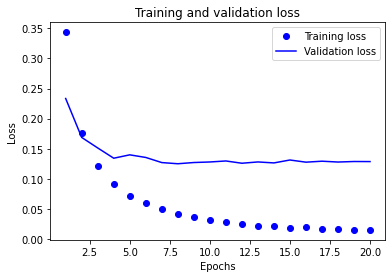

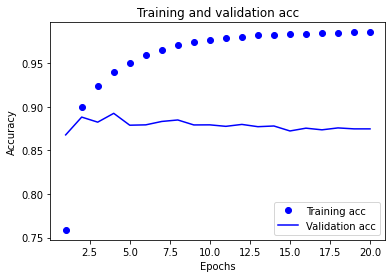

In [ ]:
plot_loss(history_model_1)

# plots the accuracy graph
acc = history_model_1.history['accuracy']
val_acc = history_model_1.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_1, acc, val_acc, epochs)

As plotted on the graph, model 1 shows substantial decrease in validation accuracy as well as a rapid increase in validation loss after the 3rd epoch. This is a clear sign of overfitting, which has resulted in poor performance of the model.

### **Model 2 Loss and Accuracy Plots**

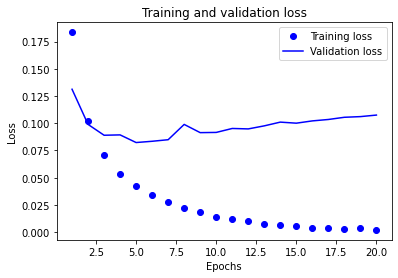

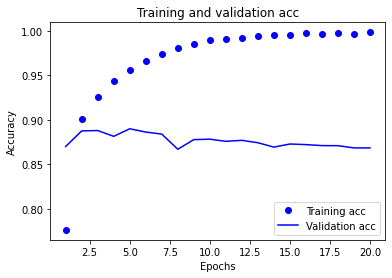

In [ ]:
plot_loss(history_model_2)

# plots the accuracy graph
acc = history_model_2.history['accuracy']
val_acc = history_model_2.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_2, acc, val_acc, epochs)

The plotted graphs from model 2 shows consistent overfitting as previously shown in model 1. Although the maximum accuracy is less than that of the previous iteration, the model was able to achieve a lower loss. Therefore, it has been decided that the `mse` loss function will be retained for the next ierations.

### **Model 3 Loss and Accuracy Plots**

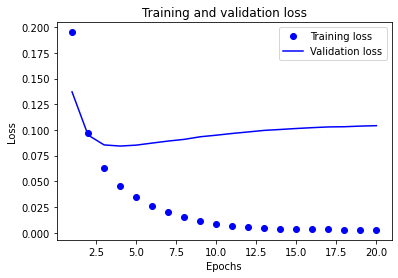

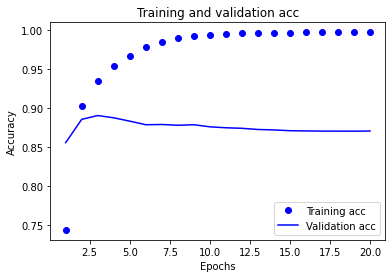

In [ ]:
plot_loss(history_model_3)

# plots the accuracy graph
acc = history_model_3.history['accuracy']
val_acc = history_model_3.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_3, acc, val_acc, epochs)

The plotted graphs for model 3 shows that the model achieved a higher accuracy at the third epoch when compared with the previous iteration. Although there are still signs of overfitting in the model, it may be that tuning the learning rate of optimiser could improve the performance. Therefore, the `adam` optimiser function will be retained for the model iteration.

### **Model 4 Loss and Accuracy Plots**

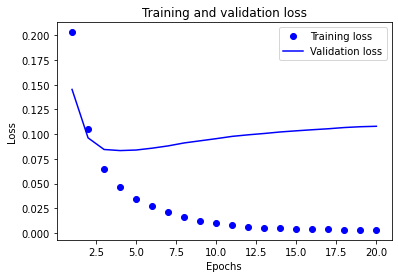

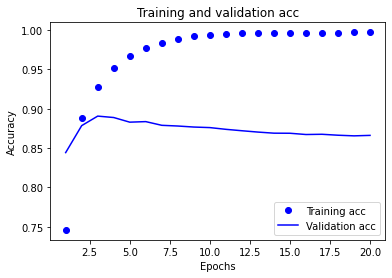

In [ ]:
plot_loss(history_model_4)

# plots the accuracy graph
acc = history_model_4.history['accuracy']
val_acc = history_model_4.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_4, acc, val_acc, epochs)

The plotted graphs for model 4 shows less overfitting when compared with model 3. Although the difference is vague, the learning rate of 0.001 will be retained to further improve the model in the next iteration.

### **Model 5 Loss and Accuracy Plots**

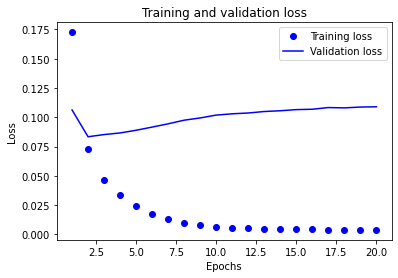

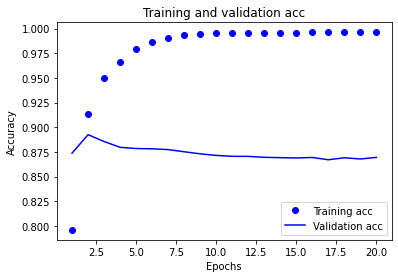

In [ ]:
plot_loss(history_model_5)

# plots the accuracy graph
acc = history_model_5.history['accuracy']
val_acc = history_model_5.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_5, acc, val_acc, epochs)

The plotted graphs above shows that model 5 starts to deteriorate in accuracy and rapidly increase in loss immediately after the second epoch. This showed more overfitting than the previous model, and therefore it was decided to have 16 units for the layer 1 hyperparameter instead of 32.

### **Model 6 Loss and Accuracy Plots**

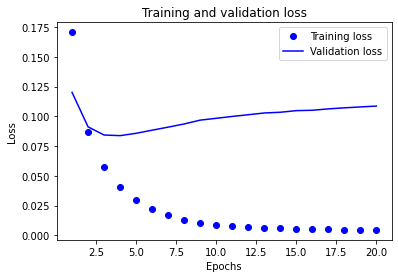

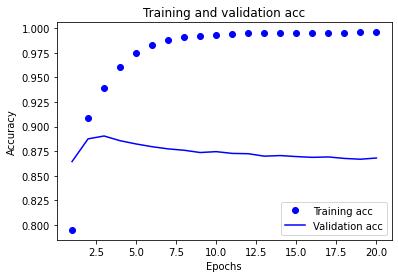

In [ ]:
plot_loss(history_model_6)

# plots the accuracy graph
acc = history_model_6.history['accuracy']
val_acc = history_model_6.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_6, acc, val_acc, epochs)

The plotted graphs above shows that model 6 starts to degrade in accuracy and rapidly increase in loss immediately after the third epoch. This is a clear sign of overfitting and shows that replacing `relu` with `tanh` didn't improve the performance of the model.

### **Model 7 Loss and Accuracy Plots**

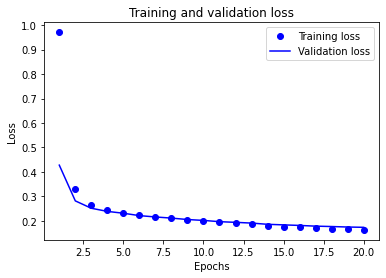

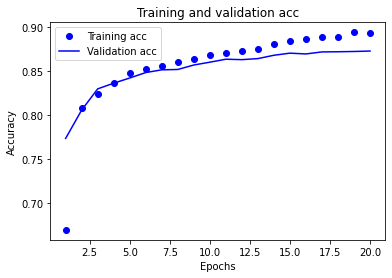

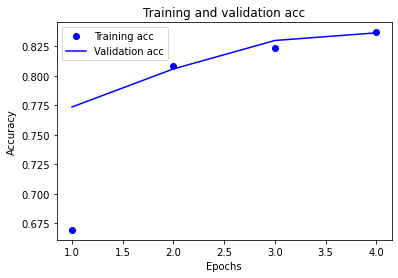

In [ ]:
plot_loss(history_model_7)

# plots the accuracy graph with overfitting
acc = history_model_7.history['accuracy']
val_acc = history_model_7.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_7, acc, val_acc, epochs)

# plots the accuracy graph without overfitting
acc = history_model_7.history['accuracy'][0:4]
val_acc = history_model_7.history['val_accuracy'][0:4]
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_7, acc, val_acc, epochs)

The plotted graphs above shows that model 7 achieved a stable accuracy and minimum loss at 20 epochs. The graph doesn't show any signs of overfitting which means there are no significant performance issues with model 7. This shows that adding L1 regularisation has had an effect in reducing overfitting on the model.

### **Model 8 Loss and Accuracy Plots**

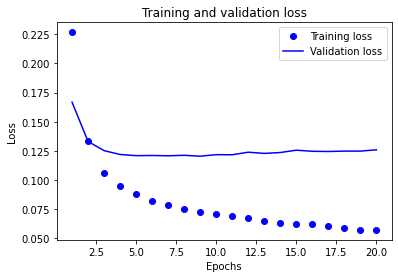

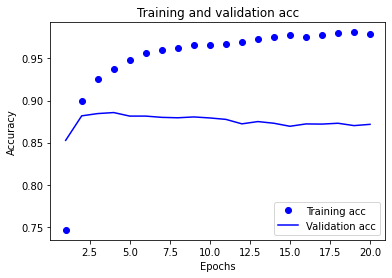

In [ ]:
plot_loss(history_model_8)

# plots the accuracy graph
acc = history_model_8.history['accuracy']
val_acc = history_model_8.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_8, acc, val_acc, epochs)

The plotted graphs above shows that model 8 starts to degrade in accuracy and rapidly increase in loss immediately after the second epoch. This is a clear sign of overfitting and therefore has had an effect on the performance of the model.

### **Model 9 Loss and Accuracy Plots**

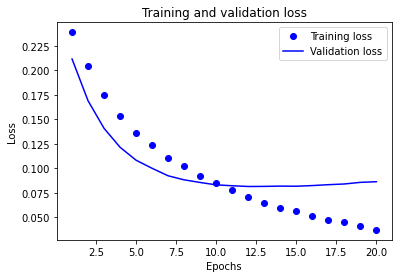

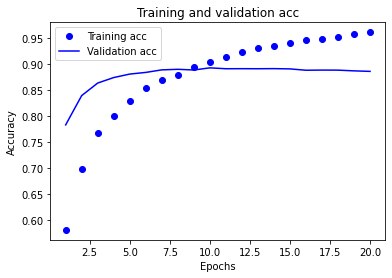

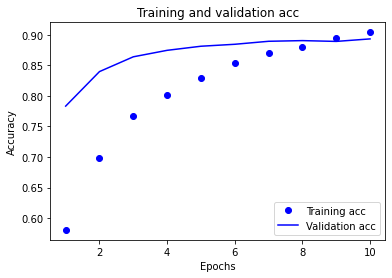

In [ ]:
plot_loss(history_model_9)

# plots the accuracy graph with overfitting
acc = history_model_9.history['accuracy']
val_acc = history_model_9.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_9, acc, val_acc, epochs)

# # plots the accuracy graph without overfitting
acc = history_model_9.history['accuracy'][0:10]
val_acc = history_model_9.history['val_accuracy'][0:10]
epochs = range(1, len(acc) + 1)

plot_accuracy(history_model_9, acc, val_acc, epochs)

The plotted graphs above shows that model 9 achieved a high accuracy and minimum loss at 10 epochs, and then started to overfit after. This shows that model 9 performs at its optimum at 10 epochs. Since model 9 was able to achieve a higher accuracy and lower loss than any other iteration at 10 epochs, it is clear that the model 9 architecture will be used in the final production model.

### **Final Production Model Evaluation**

The final production model has been developed with the same parameters and model architecture from the model 9 iteration. The model has then been trained on the training dataset for 10 epochs, and finally evaluated on the test dataset.

In [ ]:
# build final model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

# compile final model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['accuracy'])

# train final model
model.fit(x_train, 
          y_train,
          epochs=10,
          batch_size=512)

# evaluate final model with the test data
test_results = model.evaluate(x_test, y_test)
print(test_results)

Epoch 1/10
49/49 [==============================] - 2s 31ms/step - loss: 0.2312 - accuracy: 0.6052
Epoch 2/10
49/49 [==============================] - 2s 34ms/step - loss: 0.1838 - accuracy: 0.7388
Epoch 3/10
49/49 [==============================] - 1s 29ms/step - loss: 0.1493 - accuracy: 0.8120
Epoch 4/10
49/49 [==============================] - 1s 27ms/step - loss: 0.1272 - accuracy: 0.8520
Epoch 5/10
49/49 [==============================] - 1s 30ms/step - loss: 0.1104 - accuracy: 0.8762
Epoch 6/10
49/49 [==============================] - 1s 30ms/step - loss: 0.0959 - accuracy: 0.8978
Epoch 7/10
49/49 [==============================] - 2s 32ms/step - loss: 0.0854 - accuracy: 0.9113
Epoch 8/10
49/49 [==============================] - 2s 35ms/step - loss: 0.0774 - accuracy: 0.9198
Epoch 9/10
49/49 [==============================] - 2s 35ms/step - loss: 0.0681 - accuracy: 0.9298
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0833 - accuracy: 0.8884
[0.08325

### **Summary of Final Production Model**

|Model Iteration:| Units:| Hidden Layers: |Optimizer:|Learning Rate:| L1 Val: | L2 Val: |Dropout Val:| Minimum Loss:| Maximum Accuracy:  |
|:-----:|:-------:|:-------:|:-------:|:------:|:---:|:----:|:-------:|:--------:|:-------------:|
|1  |16, 16, 1  |3  |rmsprop  |N/A  |N/A  |N/A  |N/A  |0.1242  |0.8874
|9  |16, 16, 1  |3  |adam  |0.0005  |N/A  |N/A  |0.5  |0.0814  |0.8933
|Final  |16, 16, 1  |3  |adam  |0.0005  |N/A  |N/A  |0.5  |0.0833  |0.8884


The test results from the final production model evalulation shows that the model was able to achieve an accuracy of 0.8884 and a loss of 0.0833 when validated with the test data. These results are almost similar when compared with the validation loss and validation accuracy from the model 9 iteration. Although model 9 has slightly better results, it is clear that there were no significant performance issues with the final production model as it was able to achieve 88% accuracy in predicting unique movie reviews.

### **Final Production Model Predictions**

In the cell below, we can see an output of the first 10 predictions of positive/negative movie reviews against the actual reviews. The reviews are represented as numbers, 0 being a negative review and 1 being a positive review. After analysing this data, it is evident that the model predictions are not entirely accurate as there are discrepancies with some predicted reviews when compared with the test labels.

In [ ]:
for i in range(10):
    predictions = model.predict(x_test[i:i+1])[0][0]
    print("Review " + str(i+1))
    print("Predicted: " + str(round(predictions)))
    print("Label: " + str(test_labels[i]))
    print()

Review 1
Predicted: 0
Label: 0

Review 2
Predicted: 1
Label: 1

Review 3
Predicted: 1
Label: 1

Review 4
Predicted: 1
Label: 0

Review 5
Predicted: 1
Label: 1

Review 6
Predicted: 1
Label: 1

Review 7
Predicted: 1
Label: 1

Review 8
Predicted: 0
Label: 0

Review 9
Predicted: 1
Label: 0

Review 10
Predicted: 1
Label: 1



### **Example of a positive review**

In the cell below, we can see an accurate positive review as the model has classified this review to be positive using the label 1. The corresponding test label has confirmed this by also displaying a 1.

In [ ]:
predictions = model.predict(x_test[2:3])[0][0]

print("Review 3: " + str(review_decoder(test_data[2])))
print("Predicted: " + str(round(predictions)))
print("Label: " + str(test_labels[2]))

Review 3: ? many animation buffs consider ? ? the great forgotten genius of one special branch of the art puppet animation which he invented almost single ? and as it happened almost accidentally as a young man ? was more interested in ? than the cinema but his ? attempt to film two ? ? fighting led to an unexpected breakthrough in film making when he realized he could ? movement by ? beetle ? and ? them one frame at a time this discovery led to the production of amazingly elaborate classic short the ? revenge which he made in russia in ? at a time when motion picture animation of all sorts was in its ? br br the political ? of the russian revolution caused ? to move to paris where one of his first productions ? was a dark political satire ? known as ? or the ? who wanted a king a strain of black comedy can be found in almost all of films but here it is very dark indeed aimed more at grown ups who can appreciate the satirical aspects than children who would most likely find the climax 

### **Example of a negative review**

In the cell below, we can see an accurate negative review as the model has classified this review to be negative using the label 0. The corresponding test label has confirmed this by also displaying a 0.

In [ ]:
predictions = model.predict(x_test[0:1])[0][0]

print("Review 1: " + str(review_decoder(test_data[0])))
print("Predicted: " + str(round(predictions)))
print("Label: " + str(test_labels[0]))

Review 1: ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Predicted: 0
Label: 0


### **Example of an inaccurate review**

In the cell below, we can see that model isn't entirely accurate in classifying a positive/negative review. In this case, we can see that model has classified this review as positive by displaying a 1, when in fact the review was actually negative. This is confirmed by the corresponding test label which has displayed a 0.

In [ ]:
predictions = model.predict(x_test[8:9])[0][0]

print("Review 9: " + str(review_decoder(test_data[8])))
print("Predicted: " + str(round(predictions)))
print("Label: " + str(test_labels[8]))

Review 9: ? hollywood had a long love affair with bogus ? nights tales but few of these products have stood the test of time the most memorable were the jon hall maria ? films which have long since become camp this one is filled with dubbed songs ? ? and slapstick it's a truly crop of corn and pretty near ? today it was nominated for its imaginative special effects which are almost ? in this day and age ? mainly of trick photography the only outstanding positive feature which survives is its beautiful color and clarity sad to say of the many films made in this genre few of them come up to alexander ? original thief of ? almost any other ? nights film is superior to this one though it's a loser
Predicted: 1
Label: 0


## **Conclusion**

Overall, a total of 9 iterations were made to the baseline model to achieve a final production model that could accurately predict movie review sentiments. These iterations comprised of, changing the loss and optimiser function to decrease, tuning the learning rate, increasing the units per layer, changing the activation functions, adding L1/L2 regularisation and dropout layers to prevent overfitting. This resulted in a validation accuracy of 88% after being evaluated with unique test data. Based on this result, it was clear that adding extra iterations could not exceed the accuracy anywhere beyond 90% regardless of how well-tuned the model was.

The final production model proved the following hypotheses to be true: the outputs can be predicted based on the given inputs, and the availability of data is adequately useful to study the relationship between the inputs and outputs. These were proved based on the tests carried out after evaluating the model; the first 10 movie review sentiments were predicted by the model and were then compared against their corresponding test labels. These tests showed that the model was able to correctly predict most of the movie review sentiments. Although the model wasn’t entirely accurate, it was expected to have some discrepancies since it didn’t reach beyond 90% accuracy.

The universal workflow of DLWP was helpful in supporting the development of an optimal model with greater statistical power than the baseline model. The implementation of dropout layers and reducing the learning rate were both key factors in achieving high accuracy and minimum loss without causing any significant overfitting.

**Future Research**

For future research, to achieve a more reliable and extensive model, it would be ideal to use cross-datasets that contain more unseen movie sentiment data. This would allow the model to be less restricted to the IMDB dataset and more widespread with different datasets that have been prepared the same way as the IMDB dataset. Nevertheless, the results from the final production model have proven to be remarkable with its high accuracy on data it hasn't even seen.

### **References**

- Chollet, F: "Deep Learning with Python", 2018
- Blackwell, T: Artificial Intelligence, Coursework Examples, 2021